In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['irish.csv']


In [2]:
# Importing the dataset
dataset = pd.read_csv('../input/irish.csv')
X = dataset.iloc[:, :2].values
y = dataset.iloc[:, -1].values

In [3]:
# # # #  # # 
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y= labelencoder_y.fit_transform(y)

In [4]:
dataset.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X = sc.transform(X)

In [7]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
pca.explained_variance_ratio_

array([0.52740556, 0.47259444])

In [8]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(C=10,kernel = 'rbf', random_state = 0,gamma=0.1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred )

array([[13,  0,  0],
       [ 0, 11,  5],
       [ 0,  4,  5]])

In [9]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

0.7685198135198135
0.14289624603676637


In [10]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 100,400,600], 'kernel': ['linear'],'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
               ]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [11]:
best_accuracy

0.8035714285714286

In [12]:
best_parameters

{'C': 100, 'gamma': 0.1, 'kernel': 'linear'}

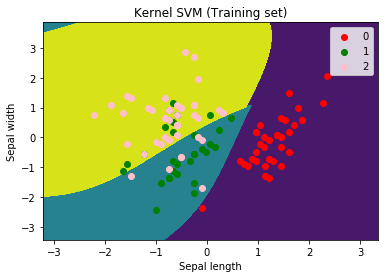

In [13]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set =X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             )
#m= classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','pink'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()


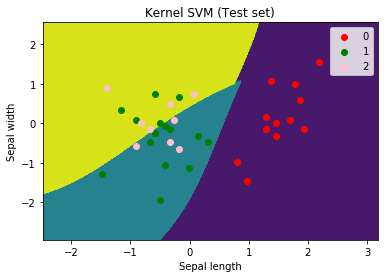

In [14]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
#X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape))
#m= classifier.fit_predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','pink'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

In [15]:
#  # # ##  # #CLUSTURING ALGORITHIM ## # # # #  
#Import Library
from sklearn.cluster import KMeans
#Assumed you have, X (attributes) for training data set and x_test(attributes) of test_dataset
# Create KNeighbors classifier object model 
classifier= KMeans(n_clusters=3, random_state=0)
# Train the model using the training sets and check score
classifier.fit(X_train)
#Predict Output
y_pred=classifier.predict(X_test)


#Import Library
from sklearn.cluster import AgglomerativeClustering

# Create clustering object
classifier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  

# Fit model
y_pred=classifier.fit_predict(X_train) 